# Maximum Likelihood Estimation

## Probability distribution case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(1000,)


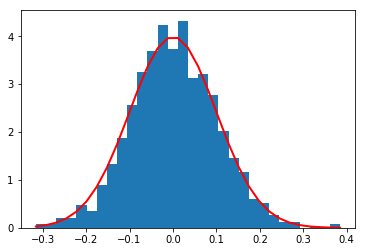

In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)
print(data.shape)

count, bins, ignored = plt.hist(data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [3]:
from UQpy.Inference import Model
candidate_model = Model(model_type = 'pdf', model_name='normal')

['normal', 'uniform', 'binomial', 'beta', 'genextreme', 'chisquare', 'lognormal', 'gamma', 'exponential', 'cauchy', 'levy', 'logistic', 'laplace', 'maxwell', 'inv_gauss', 'pareto', 'rayleigh']


In [4]:
from UQpy.Inference import MLEstimation
ml_estimator = MLEstimation(model_instance=candidate_model, data=data)
print('ML estimates of the mean={}, std. dev={}'.format(ml_estimator.param[0], ml_estimator.param[1]))

ML estimates of the mean=0.003251914396596077, std. dev=0.09967452982493881


## Linear model case <3

In [5]:
# Generate data
from scipy.stats import multivariate_normal

param_true = np.array([1.0, 2.0]).reshape(1, -1)
error_covariance = np.eye(50)

print(param_true.shape)
from UQpy.RunModel import RunModel
z = RunModel(samples=param_true, model_type='python', model_script='pfn_linear.py')

data = z.model_eval.QOI[0]+multivariate_normal.rvs(mean=None, cov=error_covariance, size=1)
print(data)

(1, 2)

Evaluating the model...

[ 5.18487024e-01 -4.97588777e-02  6.96287826e-01  2.65048503e-01
  3.61543363e+00  3.74127622e+00  4.82294018e+00  7.83201195e+00
  5.71435521e+00  8.58685916e+00  1.17198513e+01  1.24708907e+01
  1.37313546e+01  1.91969429e+01  1.94356508e+01  2.02376255e+01
  2.49526051e+01  2.77295005e+01  3.14139784e+01  3.39756376e+01
  3.85067916e+01  3.89360541e+01  4.60046645e+01  4.83449780e+01
  5.44346696e+01  5.68477424e+01  6.22437251e+01  6.54987718e+01
  6.93416739e+01  7.61357446e+01  8.22143458e+01  8.43596107e+01
  9.04468674e+01  9.69420452e+01  1.01686100e+02  1.10515005e+02
  1.14109440e+02  1.23031482e+02  1.27095058e+02  1.33597585e+02
  1.41587700e+02  1.49819991e+02  1.54634678e+02  1.62627046e+02
  1.69106446e+02  1.77798997e+02  1.86004279e+02  1.94899022e+02
  1.99838200e+02  2.09872177e+02]


In [6]:
candidate_model = Model(model_type='python', model_script='pfn_linear.py', n_params=2, 
                        error_covariance=error_covariance)

In [7]:
ml_estimator = MLEstimation(model_instance=candidate_model, data=data)

Optimization terminated successfully.
         Current function value: 76.863704
         Iterations: 116
         Function evaluations: 224


In [8]:
print(ml_estimator.param)

[1.05686999 1.98964492]
